In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [75]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [76]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [77]:
print(type(iris.target))

<class 'numpy.ndarray'>


In [78]:
print(iris.data.shape)

(150, 4)


In [79]:
print(iris.target.shape)

(150,)


### Importing KNN
Using KNN = 1

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [81]:
X = iris.data
y = iris.target

In [82]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [83]:
print(knn.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [84]:
print(knn.predict([[5.9, 3, 5.1, 1.8]]))

[2]


#### Separate data into train and test groups

In [85]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [86]:
print(X_train.shape)

(90, 4)


In [87]:
print(X_test.shape)

(60, 4)


In [88]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [89]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [90]:
from sklearn import metrics
performance = metrics.accuracy_score(y_test, predictions)
print(performance)

0.9833333333333333


### Exercise: Picking the best value of K
Create a loop to apply KNN with values ranging from 1 to 25. Test the performance of each K value and present the ones that best suits our dataset.

In [93]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
results = {}

for knnValue in range(1,26):
    knn = KNeighborsClassifier(n_neighbors= knnValue)
    
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    performance = metrics.accuracy_score(y_test, predictions)
    results[knnValue] = round(performance,4)

most_common = Counter(results).most_common()
print(most_common[:3])

[(7, 1.0), (9, 1.0), (11, 1.0)]


Text(0, 0.5, 'Performance')

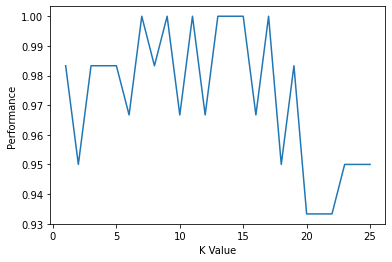

In [94]:
import matplotlib.pyplot as plt

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("K Value")
plt.ylabel("Performance")

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_predict = logreg.predict([[6.7, 3.3, 5.7, 2.5]])
print(lr_predict)

[2]


In [111]:
print(iris.target_names[lr_predict])

['virginica']


In [121]:
# Probability 1 vs others
import numpy as np
lr_predict_proba = logreg.predict_proba([[6.7, 3.3, 5.7, 2.5]]).round(3)

one_vs_others = np.dstack(( iris.target_names, lr_predict_proba))

print(one_vs_others)


[[['setosa' '0.0']
  ['versicolor' '0.025']
  ['virginica' '0.975']]]
